In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.head()

,model_name,model_year,kms_driven,owner,location,price
0,Hero CBZ X-Treme Rear Disc,2014,26916.0,1st,Lucknow,40000.0
1,Bajaj Pulsar 220 DTS-i Standard,2017,8500.0,1st,Mumbai,90000.0
2,Bajaj Discover 135 Standard,2011,40000.0,1st,Kolkata,25000.0
3,Hero Honda Splendor Plus Drum,2011,40000.0,1st,Bangalore,30000.0
4,Bajaj Platina 100 ES Drum,2018,18000.0,1st,Baran,41000.0


In [4]:
df.describe()

,model_year,kms_driven,price
count,5504.000000,5504.000000,5.504000e+03
mean,2016.235647,28860.420058,7.649927e+04
std,3.657750,31203.686275,9.650346e+04
min,1970.000000,1.000000,1.000000e+03
25%,2015.000000,11000.000000,3.400000e+04
50%,2017.000000,22000.000000,5.300000e+04
75%,2019.000000,38000.000000,9.000000e+04
max,2021.000000,720000.000000,2.400000e+06


In [5]:
df.model_year.unique()

array([2014, 2017, 2011, 2018, 2012, 2019, 1996, 2007, 2008, 2006, 2013,
       1986, 2015, 2010, 1998, 2016, 2020, 2021, 2000, 2009, 2003, 2005,
       2004, 2002, 1989, 1999, 2001, 1983, 1982, 1995, 1980, 1981, 1997,
       1970, 1991])

In [6]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,price
4450,Royal Enfield Classic 350cc,2016,49376.0,1st,Hyderabad,160000.0
4346,Bajaj Discover 100cc,2014,38000.0,1st,Masaurhi,16000.0
733,Royal Enfield Classic Gunmetal Grey ABS,2019,7500.0,1st,Ajmer,170000.0
2346,Hero Splendor Plus 100 Million Edition,2019,12000.0,1st,Ahmedabad,25000.0
1252,Hero Maestro Edge Self Start Drum Brake Alloy ...,2019,3900.0,1st,New Delhi,42000.0


## Handle model_name

### Let's take only first two words of model_name

In [7]:
df['model_name'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:2]))

In [8]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price
2079,Bajaj Pulsar,2015,27820.0,1st,Chennai,170000.0
2499,Hero Splendor,2021,12000.0,1st,Kolkata,175000.0
1721,Honda Activa,2018,5123.0,1st,Mumbai,19500.0
879,TVS Centra,2004,31000.0,1st,Bharuch,10000.0
4030,Benelli TNT,2018,3806.0,1st,Mumbai,250000.0
1743,Bajaj Pulsar,2018,32000.0,1st,Mumbai,65000.0
1827,Royal Enfield,2017,23000.0,1st,Bangalore,50000.0
3281,Hero,2016,97896.0,1st,Delhi,41000.0
5089,Yamaha FZS-FI,2019,2000.0,1st,Hyderabad,95000.0
5432,Bajaj Pulsar,2011,41000.0,1st,Mumbai,29000.0


In [9]:
df.model_name.value_counts()

Royal Enfield              751
Bajaj Pulsar               655
Honda Activa               438
Honda                      321
TVS Apache                 302
                          ... 
Yamaha YZF-R1M               1
Kawasaki Z800                1
TVS Excel                    1
Harley-Davidson XR1200X      1
Suzuki SlingShot             1
Name: model_name, Length: 200, dtype: int64

### There are too many models, let try to create a brand category using the model name.

In [10]:
df['brand'] = df['model_name'].apply(lambda x: x.split(' ')[0])

In [11]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price,brand
4864,Hero Splendor,2014,50000.0,2nd,Baghpat,25000.0,Hero
3324,Hero,2018,21324.0,1st,Delhi,53000.0,Hero
3180,TVS,2017,43663.0,1st,Delhi,65000.0,TVS
1474,Bajaj Pulsar,2017,31000.0,1st,Mumbai,35000.0,Bajaj
39,KTM 200,2021,1000.0,1st,Satara,200000.0,KTM
1480,Suzuki Burgman,2018,490.0,1st,Mumbai,75000.0,Suzuki
2364,Honda Activa,2019,16173.0,1st,Ahmedabad,21500.0,Honda
2194,KTM RC,2018,12300.0,1st,Hyderabad,30000.0,KTM
921,Bajaj Discover,2012,74800.0,1st,Lucknow,22000.0,Bajaj
3090,Hero,2017,33024.0,1st,Delhi,42000.0,Hero


In [12]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()

Unique Brands : 28


Bajaj              1103
Honda              1061
Royal               845
Hero                815
TVS                 677
Yamaha              349
KTM                 309
Suzuki              144
Harley-Davidson      40
Jawa                 33
UM                   27
Kawasaki             16
Benelli              13
Triumph              11
Hyosung              10
Aprilia               9
Mahindra              8
Husqvarna             8
Vespa                 6
Ducati                6
JAWA                  3
BMW                   3
LML                   2
Okinawa               2
Piaggio               1
22Kymco               1
Indian                1
Fb                    1
Name: brand, dtype: int64

### Let's take only top 13 brands as our base brand & make other as 'other' category

In [13]:
top_brands = df['brand'].value_counts().index[:10]

In [14]:
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

In [15]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price,brand
1686,Honda Activa,2018,11521.0,1st,Mumbai,18500.0,Honda
3567,TVS,2018,30971.0,1st,Delhi,52000.0,TVS
4517,Bajaj Pulsar,2013,17000.0,1st,Mumbai,25200.0,Bajaj
3120,TVS,2018,16142.0,1st,Delhi,55000.0,TVS
1773,Honda Activa,2018,10400.0,1st,Mumbai,25000.0,Honda
4673,Royal Enfield,2018,3745.0,1st,Mohali,171700.0,Royal
1220,Suzuki Gixxer,2015,42000.0,1st,New Delhi,35000.0,Suzuki
238,Hero Glamour,2020,18500.0,1st,Narasaropet,78000.0,Hero
5292,Suzuki Gixxer,2018,15000.0,1st,Delhi,75900.0,Suzuki
3617,Hero,2016,13555.0,1st,Delhi,38000.0,Hero


### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [16]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

In [17]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,price,brand
1154,Honda Activa,2017,7500.0,1st,New Delhi,40000.0,Honda
889,Honda Activa,2015,55000.0,1st,Kochi,45000.0,Honda
1097,Hero Splendor,2011,25000.0,3rd,New Delhi,27000.0,Hero
4517,Bajaj Pulsar,2013,17000.0,1st,Mumbai,25200.0,Bajaj
3763,Royal Enfield,2015,15000.0,2nd,Bangalore,100000.0,Royal Enfield


### Drop the model_name as we can work with the brand only

In [18]:
df = df.drop('model_name',axis=1)

## Handle owner

In [19]:
df.owner.unique()

array(['1st', '3rd', '2nd', '5th', '4th'], dtype=object)

### owner category is pretty much sorted, we can directly encode that using OrdinalEncoding during model building.

## Handle location

In [20]:
print('Total Unique Locations :',len(df.location.unique()))

Total Unique Locations : 430


In [21]:
df.location.value_counts()[:10]

Delhi        1590
Bangalore     559
Mumbai        525
Hyderabad     332
New Delhi     249
Kolkata       190
Jaipur        181
Ahmedabad     174
Chennai       168
Pune          146
Name: location, dtype: int64

In [22]:
# Let's merge new delhi with delhi
df['location'] = df.location.str.replace('New Delhi','Delhi')

In [23]:
df.location.value_counts()[:10]

Delhi        1839
Bangalore     559
Mumbai        525
Hyderabad     332
Kolkata       190
Jaipur        181
Ahmedabad     174
Chennai       168
Pune          146
Gurgaon        90
Name: location, dtype: int64

### Let's take only top 5 locations as our base categories and make others as 'other' category

In [24]:
top_locations = df.location.value_counts().index[:10]

In [25]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

In [26]:
df.sample(10)

,model_year,kms_driven,owner,location,price,brand
3223,2018,44200.0,1st,Delhi,44000.0,TVS
181,2011,8885.0,1st,other,20000.0,Bajaj
4673,2018,3745.0,1st,other,171700.0,Royal Enfield
3453,2017,26287.0,1st,Delhi,78000.0,TVS
156,2015,45000.0,1st,other,100000.0,Royal Enfield
4127,2020,4790.0,1st,other,95000.0,TVS
1409,2021,10000.0,1st,other,45000.0,Honda
5240,2010,4950.0,1st,Mumbai,70000.0,Royal Enfield
617,2017,50000.0,1st,other,40000.0,Honda
4749,2017,22000.0,1st,Jaipur,40000.0,Bajaj


In [27]:
# Recorder the column
# new_order = ['brand','model_year','kms_driven','owner','location','price']
new_order = [5,0,1,2,3,4]
df = df[df.columns[new_order]]

In [28]:
df.sample()

,brand,model_year,kms_driven,owner,location,price
138,Suzuki,2019,7500.0,1st,Bangalore,70000.0


In [29]:
# make the price,model_year as int data type
df['price'] = df['price'].astype(int)
df['model_year'] = df['model_year'].astype(int)
df['kms_driven'] = df['kms_driven'].astype(int)

### Build age feature using model_year

In [30]:
import datetime
current_year = datetime.date.today().year

df['model_age'] = df.model_year.apply(lambda x: current_year - x)

In [31]:
df.head()

,brand,model_year,kms_driven,owner,location,price,model_age
0,Hero,2014,26916,1st,other,40000,7
1,Bajaj,2017,8500,1st,Mumbai,90000,4
2,Bajaj,2011,40000,1st,Kolkata,25000,10
3,Hero,2011,40000,1st,Bangalore,30000,10
4,Bajaj,2018,18000,1st,other,41000,3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand       5504 non-null   object
 1   model_year  5504 non-null   int64 
 2   kms_driven  5504 non-null   int64 
 3   owner       5504 non-null   object
 4   location    5504 non-null   object
 5   price       5504 non-null   int64 
 6   model_age   5504 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 301.1+ KB


## Outlier Detection

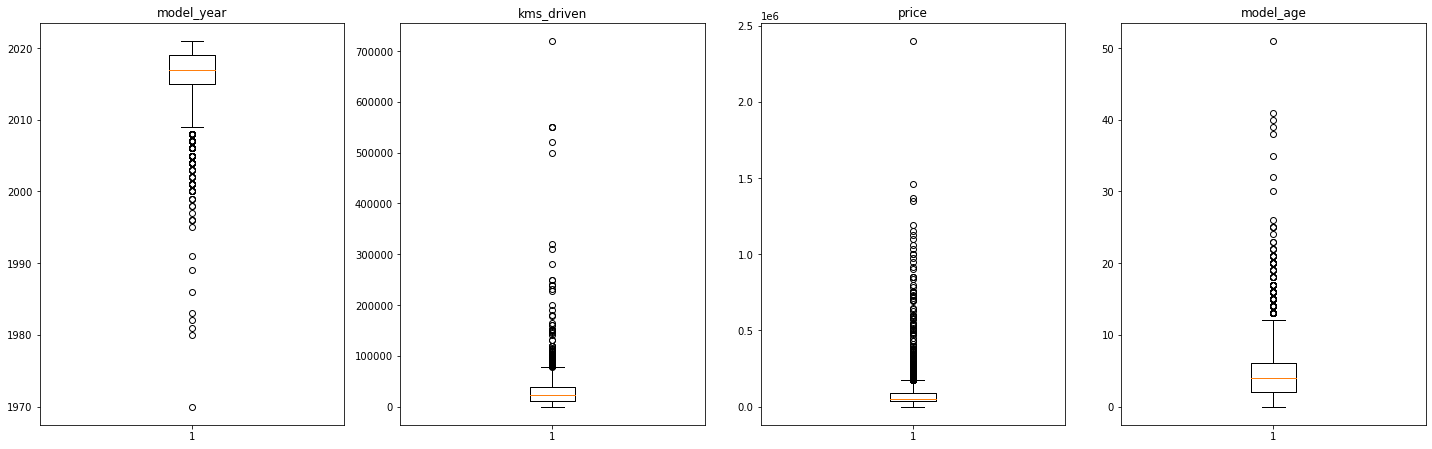

In [33]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

    # outlier detection using boxplot
    plt.figure(figsize=(20,30))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

In [34]:
new_df = df[(df['kms_driven'] <= 50000) & (df['kms_driven'] > 5000)]

In [35]:
new_df = new_df[(new_df['price'] >= 10000) & (new_df['price'] <= 1.5e6)]

In [36]:
new_df = new_df[new_df['model_year'] >= 2000]
new_df.shape

(4132, 7)

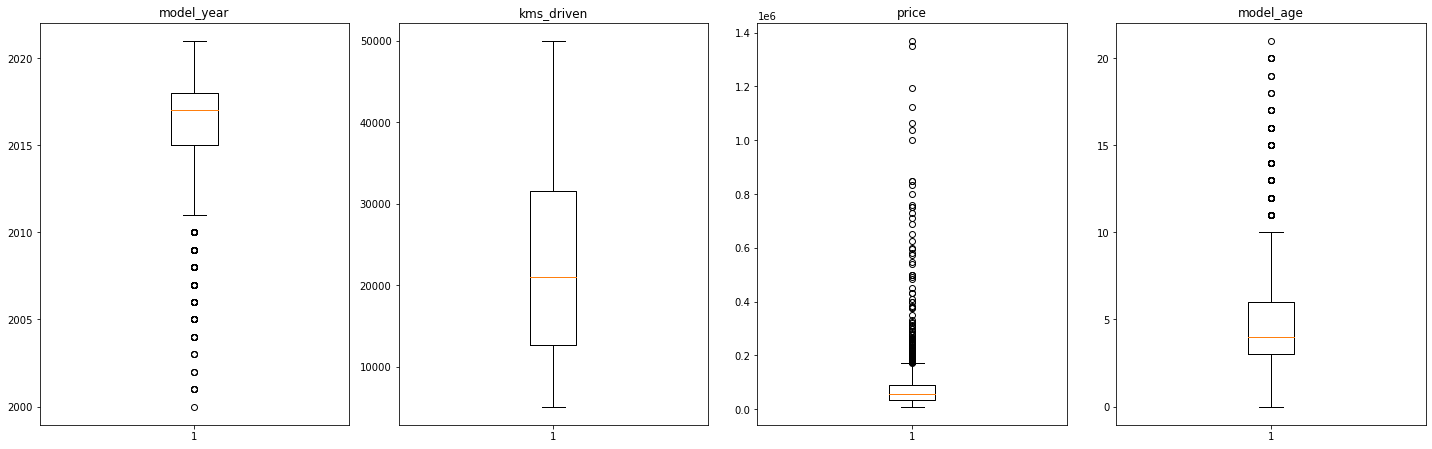

In [37]:
box_plot(new_df)

In [38]:
new_df.describe()

,model_year,kms_driven,price,model_age
count,4132.000000,4132.000000,4.132000e+03,4132.000000
mean,2016.447483,22966.928122,7.371314e+04,4.552517
std,2.992187,12101.734389,8.023525e+04,2.992187
min,2000.000000,5100.000000,1.000000e+04,0.000000
25%,2015.000000,12652.500000,3.500000e+04,3.000000
50%,2017.000000,21000.000000,5.500000e+04,4.000000
75%,2018.000000,31511.750000,9.000000e+04,6.000000
max,2021.000000,50000.000000,1.369500e+06,21.000000


In [39]:
new_df.shape

(4132, 7)

In [40]:
## Save the processed data
df = new_df
df.to_csv('../data/processed/processed.csv',index=False)